# Image Captioning Model

In [1]:
def download_repositry():
    %cd /kaggle/working
    ! rm -r Image-Captioning2
    ! git clone https://github.com/MahmoudQaid/Image-Captioning2.git
    %cd Image-Captioning2
download_repositry()

/kaggle/working
rm: cannot remove 'Image-Captioning2': No such file or directory
Cloning into 'Image-Captioning2'...
remote: Enumerating objects: 113, done.
remote: Counting objects: 100% (113/113), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 113 (delta 44), reused 96 (delta 27), pack-reused 0
Receiving objects: 100% (113/113), 7.18 MiB | 8.62 MiB/s, done.
Resolving deltas: 100% (44/44), done.
/kaggle/working/Image-Captioning2


### install packages

In [3]:
pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.0/377.0 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 70.1 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.4/235.4 kB 21.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/104.3 MB 11.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 70.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 kB 48.0 MB/s eta 0:00:00
  Preparing metadata (setup.

3 Beams:  A man laying on a bench next to a dog.
Nyquest:  A man laying on a bench with a dog.



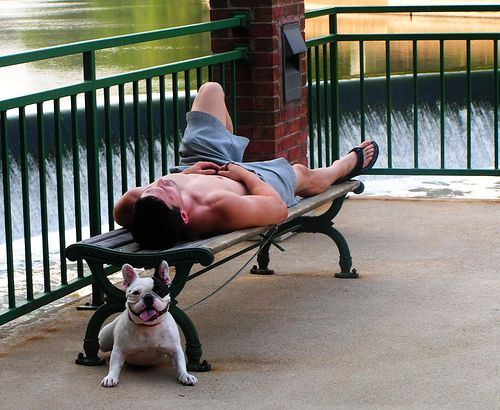

In [25]:
# to predict by our model
from our_predict import predict
from PIL import Image
img_path='testing_images/1.jpg'


print('3 Beams: ',predict(img_path)+'.')
print('Nyquest: ',predict(img_path,sample=True)+'.')
print()

Image.open(img_path)

# To evaluate the model

In [45]:
from tqdm.notebook import tqdm
import json
config = json.load(open('config.json','r'))
args= json.load(open('args.json','r'))
config,args

args['evaluate']=True
config['load_checkpoint']=False
json.dump(config,open('config.json','w'))
json.dump(args,open('args.json','w'))

({'image_root': '/kaggle/input/flickr8k/Images/',
  'ann_root': 'annotations',
  'coco_gt_root': 'annotation/coco_gt',
  'karpathy_annot_path': '/kaggle/input/karpathy-splits/dataset_flickr8k.json',
  'pretrained': '/kaggle/input/coco-with-dell-all-mask/Image-Captioning/output/Caption_coco/checkpoint_current.pth',
  'vit': 'base',
  'vit_grad_ckpt': False,
  'vit_ckpt_layer': 0,
  'batch_size': 16,
  'init_lr': 1e-05,
  'image_size': 384,
  'max_length': 50,
  'min_length': 5,
  'num_beams': 3,
  'prompt': 'a picture of ',
  'weight_decay': 0.05,
  'min_lr': 0,
  'max_epoch': 5,
  'checkpoint': '/kaggle/input/image-captioing-checkpoint/',
  'load_checkpoint': False,
  'train_vit': False},
 {'config': './configs/caption_coco.yaml',
  'output_dir': 'output/Caption_coco',
  'evaluate': False,
  'device': 'cuda',
  'seed': 42,
  'world_size': 1,
  'dist_url': 'env://',
  'distributed': False})

In [26]:
!python our_trainer.py

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Creating captioning dataset
load checkpoint from /kaggle/input/image-captioing-checkpoint/captioner_ckpt/captioner.pth
INFO: GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
Start training
Validation DataLoader 0: 100%|████████████████| 313/313 [09:57<00:00,  1.91s/it]result file saved to output/Caption_coco/result/val_epoch0.json

COMPUTING SCORES FOR val SPLIT:

loading annotations into memory...
Done (t=0.04s)
creating index

In [54]:
from collections import defaultdict
import json,string,re

def prepare_tt_kar_text(json_file_path,pattern=None,lower=False):
    # this function return dictionary 
    with open(json_file_path,'r') as file:
        data=json.loads(file.read())
    dict_data=defaultdict(lambda: defaultdict(list))
    for example in data['images']:
        temp=[]
        for sentence in example['sentences']:
            cap=sentence['raw']
            if lower:
                cap=cap.lower()
                
            cap=cap.translate(str.maketrans('','',string.punctuation))
            
            if pattern is not None:
                cap=re.sub(pattern,'',cap)
            cap=' '.join(cap.split())
            
            dict_data[example['split']][example['filename']].append(cap)
    return dict_data
raw_kar=prepare_tt_kar_text(config['karpathy_annot_path'],pattern=None,lower=False)


from our_predict import happy_tt,args
from data.utils import coco_caption_eval

captioning_results={
    'val':json.load(open('output/Caption_coco/result/val_epoch0.json','r')),
}
preds=[]
annot={'annotations':[],'images':[]}
for i,res in enumerate(tqdm(captioning_results['val'])):
    out_cap=happy_tt.generate_text("grammar: "+res['caption'], args=args).text
    preds.append({'image_id':res['image_id'],'caption':out_cap})
    for cap in raw_kar['val'][res['image_id'].split('/')[-1]]:
        annot['images'].append({'id':res['image_id']})
        annot['annotations'].append({'image_id':res['image_id'],'caption':cap,'id':i})
eval_path='/kaggle/working'
json.dump(annot,open(eval_path+'/coco_karpathy_val_gt.json','w'))
json.dump(preds,open(eval_path+'/coco_karpathy_val_result.json','w'))
coco_val = coco_caption_eval(eval_path,eval_path+'/coco_karpathy_val_result.json','val')

# To train the captioner

In [35]:
from tqdm.notebook import tqdm
import json
config = json.load(open('config.json','r'))
args= json.load(open('args.json','r'))
args['evaluate']=False
config['load_checkpoint']=False
config['max_epoch']=5
# config['karpathy_annot_path']= '/kaggle/input/karpathy-splits/dataset_flickr8k.json'
# config['image_root']= '/kaggle/input/flickr8k/Images/'
json.dump(config,open('config.json','w'))
json.dump(args,open('args.json','w'))
config,args


({'image_root': '/kaggle/input/flickr8k/Images/',
  'ann_root': 'annotations',
  'coco_gt_root': 'annotation/coco_gt',
  'karpathy_annot_path': '/kaggle/input/karpathy-splits/dataset_flickr8k.json',
  'pretrained': '/kaggle/input/coco-with-dell-all-mask/Image-Captioning/output/Caption_coco/checkpoint_current.pth',
  'vit': 'base',
  'vit_grad_ckpt': False,
  'vit_ckpt_layer': 0,
  'batch_size': 16,
  'init_lr': 1e-05,
  'image_size': 384,
  'max_length': 50,
  'min_length': 5,
  'num_beams': 3,
  'prompt': 'a picture of ',
  'weight_decay': 0.05,
  'min_lr': 0,
  'max_epoch': 5,
  'checkpoint': '/kaggle/input/image-captioing-checkpoint/',
  'load_checkpoint': False,
  'train_vit': False},
 {'config': './configs/caption_coco.yaml',
  'output_dir': 'output/Caption_coco',
  'evaluate': False,
  'device': 'cuda',
  'seed': 42,
  'world_size': 1,
  'dist_url': 'env://',
  'distributed': False})

In [36]:
!python our_trainer.py

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Creating captioning dataset
Using downloaded and verified file: ./model_base_capfilt_large.pth
reshape position embedding from 196 to 576
INFO: GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
Start training
Epoch 0:  96%|█████████▋| 1870/1938 [15:30<00:33,  2.01it/s, loss=4.77, v_num=5]
Validation: 0it [00:00, ?it/s]
Epoch 0: 100%|██████████| 1938/1938 [17:32<00:00,  1.84it/s, loss=4.77, v_num=5]result file saved to output/Cap

In [ ]:
assert(False)

# Visualize Attention Map

In [ ]:
from glob import glob
from data.utils import load_doc_karpathy

all_paths=glob('/kaggle/input/flickr8k/Images/*')

annot=load_doc_karpathy(json_file_path='/kaggle/input/karpathy-splits/dataset_flickr8k.json')
all_test_paths=['/kaggle/input/flickr8k/Images/'+i['image'] for i in annot['test']]

In [ ]:
from PIL import Image

import cv2
import numpy as np

from skimage import transform as skimage_transform
from scipy.ndimage import filters
from matplotlib import pyplot as plt


from torchvision import transforms

normalize = transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))

transform = transforms.Compose([
    transforms.Resize((384,384),interpolation=Image.BICUBIC),
    transforms.ToTensor(),
    normalize,
])     


def getAttMap(img, attMap, blur = True, overlap = True):
    attMap -= attMap.min()
    if attMap.max() > 0:
        attMap /= attMap.max()
    attMap = skimage_transform.resize(attMap, (img.shape[:2]), order = 3, mode = 'constant')
    if blur:
        attMap = filters.gaussian_filter(attMap, 0.02*max(img.shape[:2]))
        attMap -= attMap.min()
        attMap /= attMap.max()
    cmap = plt.get_cmap('jet')
    attMapV = cmap(attMap)
    attMapV = np.delete(attMapV, 3, 2)
    if overlap:
        attMap = 1*(1-attMap**0.7).reshape(attMap.shape + (1,))*img + (attMap**0.7).reshape(attMap.shape+(1,)) * attMapV
    return attMap



In [ ]:
from our_models import TrainingModel
model=TrainingModel()

In [ ]:
import torch
device=torch.device('cuda')
model=model.to(device)
model.eval()
print()

In [ ]:
print("FHFH")

In [ ]:
import json
config=json.load(open('config.json'))

In [ ]:
import random

id=random.randint(0,len(test_imgs))
img_path='/kaggle/input/coco2014/val2014/val2014/'+test_imgs[id]

image=Image.open(img_path)
aspect_ratio = image.size[0] / image.size[1]
new_height = int(200 / aspect_ratio)
image.resize((200, new_height)).save('/kaggle/working/temp/'+img_path.split('/')[-1])
img_path='/kaggle/working/temp/'+img_path.split('/')[-1]


In [ ]:
# image_path=all_paths[876]
# image_path=all_test_paths[767]
image_path=img_path

image = Image.open(image_path).convert('RGB')
# image=image.resize(600,600)
image = transform(image)
image=image.unsqueeze(dim=0).to(device)

layer_index=-1

model.model.text_decoder.bert.encoder.layer[layer_index].crossattention.self.save_attention=False
captions = model.model.generate(image, sample=False, num_beams=config['num_beams'], max_length=config['max_length'], 
                          min_length=config['min_length'])
print(captions)
model.model.text_decoder.bert.encoder.layer[layer_index].crossattention.self.save_attention=True
loss=model.model(image.to(device='cuda'),['a picture of '+captions[0]])
model.model.zero_grad()
loss.backward()

text_input=model.model.tokenizer(['a picture of '+captions[0]],return_tensors='pt')

with torch.no_grad():
    mask = text_input.attention_mask.view(text_input.attention_mask.size(0),1,-1,1,1).to(device='cuda')
    grads=model.model.text_decoder.bert.encoder.layer[layer_index].crossattention.self.get_attn_gradients()
    cams=model.model.text_decoder.bert.encoder.layer[layer_index].crossattention.self.get_attention_map().to(device='cuda')
    
    cams = cams[:, :, :, 1:].reshape(image.size(0), 12, -1, 24, 24) * mask
    grads = grads[:, :, :, 1:].clamp(0).reshape(image.size(0), 12, -1, 24, 24) * mask
    gradcam = cams * grads
    gradcam = gradcam[0].mean(0).cpu().detach()
    
model.model.text_decoder.bert.encoder.layer[layer_index].crossattention.self.save_attention=False

In [ ]:
img_path,captions_dict['test'][img_path.split('/')[-1]],'','Our Model: '+predict(img_path)

In [ ]:
Image.open(img_path)

In [ ]:
num_image = len(text_input.input_ids[0]) -3
fig, ax = plt.subplots(num_image, 1, figsize=(15,5*num_image))

rgb_image = cv2.imread(image_path)[:, :, ::-1]
rgb_image = np.float32(rgb_image) / 255

ax[0].imshow(rgb_image)
ax[0].set_yticks([])
ax[0].set_xticks([])
ax[0].set_xlabel("Image")
            
for i,token_id in enumerate(text_input.input_ids[0][4:]):
    word = model.model.tokenizer.decode([token_id])
    gradcam_image = getAttMap(rgb_image, gradcam[i+4])
    ax[i+1].imshow(gradcam_image)
    ax[i+1].set_yticks([])
    ax[i+1].set_xticks([])
    ax[i+1].set_xlabel(word)

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
num_image = len(text_input.input_ids[0]) -3
# fig, ax = plt.subplots(num_image, 1, figsize=(15,5*num_image))
fig=plt.figure(figsize=(20,20))
rgb_image = cv2.imread(image_path)[:, :, ::-1]

rgb_image = np.float32(rgb_image) / 255
ax=fig.add_subplot(len(text_input.input_ids[0])//3,3,1)
ax.imshow(rgb_image)
ax.set_yticks([])
ax.set_xticks([])
ax.set_xlabel("Original Image")
            
for i,token_id in enumerate(text_input.input_ids[0][4:-1]):
    word = model.model.tokenizer.decode([token_id])
    gradcam_image = getAttMap(rgb_image, gradcam[i+4])
    ax=fig.add_subplot(len(text_input.input_ids[0])//3,3,i+2)
    ax.imshow(gradcam_image)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_xlabel(word)

In [ ]:
from models.blip import blip_decoder
blip_model=blip_decoder(pretrained='https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_caption_capfilt_large.pth', image_size=384, vit='base')
blip_model=blip_model.to(device)
blip_model.eval()
print()

In [ ]:
# image_path=all_paths[876]
# image_path=all_test_paths[767]
image_path=img_path

image = Image.open(image_path).convert('RGB')
# image=image.resize(600,600)
image = transform(image)
image=image.unsqueeze(dim=0).to(device)

layer_index=-1

blip_model.text_decoder.bert.encoder.layer[layer_index].crossattention.self.save_attention=False
captions = blip_model.generate(image, sample=False, num_beams=config['num_beams'], max_length=config['max_length'], 
                          min_length=config['min_length'])
print('Blip Model: '+captions[0])
blip_model.text_decoder.bert.encoder.layer[layer_index].crossattention.self.save_attention=True
loss=blip_model(image.to(device='cuda'),['a picture of '+captions[0]])
blip_model.zero_grad()
loss.backward()

text_input=blip_model.tokenizer(['a picture of '+captions[0]],return_tensors='pt')

with torch.no_grad():
    mask = text_input.attention_mask.view(text_input.attention_mask.size(0),1,-1,1,1).to(device='cuda')
    grads=blip_model.text_decoder.bert.encoder.layer[layer_index].crossattention.self.get_attn_gradients()
    cams=blip_model.text_decoder.bert.encoder.layer[layer_index].crossattention.self.get_attention_map().to(device='cuda')
    
    cams = cams[:, :, :, 1:].reshape(image.size(0), 12, -1, 24, 24) * mask
    grads = grads[:, :, :, 1:].clamp(0).reshape(image.size(0), 12, -1, 24, 24) * mask
    gradcam = cams * grads
    gradcam = gradcam[0].mean(0).cpu().detach()
    
blip_model.text_decoder.bert.encoder.layer[layer_index].crossattention.self.save_attention=False

In [ ]:
num_image = len(text_input.input_ids[0]) -3
# fig, ax = plt.subplots(num_image, 1, figsize=(15,5*num_image))
fig=plt.figure(figsize=(20,20))
rgb_image = cv2.imread(image_path)[:, :, ::-1]

rgb_image = np.float32(rgb_image) / 255
ax=fig.add_subplot(len(text_input.input_ids[0])//3,3,1)
ax.imshow(rgb_image)
ax.set_yticks([])
ax.set_xticks([])
ax.set_xlabel("Original Image")
            
for i,token_id in enumerate(text_input.input_ids[0][4:-1]):
    word = model.model.tokenizer.decode([token_id])
    gradcam_image = getAttMap(rgb_image, gradcam[i+4])
    ax=fig.add_subplot(len(text_input.input_ids[0])//3,3,i+2)
    ax.imshow(gradcam_image)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_xlabel(word)

In [ ]:
assert(False)

# Training Corrector 

In [5]:
from prepare_data import pattern
from data.utils import load_doc_karpathy
import csv
import pandas as pd


def generate_csv(csv_path, splits=['train']):
    # input_dict: {'img_name':['one caption']}
    # refs_dict: {'img_name':['caption1','cap2','cap3']}
    with open(csv_path, 'w', newline='') as csvfile:
        writter = csv.writer(csvfile)
        writter.writerow(["input", "target"])
        for sp in splits:
            for inp,tar in zip(kar_with_pattern[sp],raw_kar[sp]):
                if sp in {'test','val'}:
                    for i in range(len(inp['caption'])):
                            writter.writerow(['grammar: '+inp['caption'][i], tar['caption'][i]+'.'])
                else:
                    writter.writerow(['grammar: '+inp['caption'], tar['caption']+'.'])


kar_with_pattern=load_doc_karpathy('/kaggle/input/karpathy-splits/dataset_coco.json',pattern=pattern,lower=True)
raw_kar=load_doc_karpathy('/kaggle/input/karpathy-splits/dataset_coco.json',pattern=None,lower=False)


In [65]:

generate_csv('file.csv',['val'])

data=pd.read_csv('file.csv')
data=data.sample(frac=1)
train_df=data[:int(len(data)*0.9)]
val_df=data[int(len(data)*0.9):]

# int(len(data)*0.8)
train_df.to_csv('train.csv',index=False)
val_df.to_csv('val.csv',index=False)

In [67]:

from happytransformer import HappyTextToText, TTTrainArgs
EPOCHS=2
BATCH_SIZE=50
CHECKPOINT_PATH='corrector/'
corrector = HappyTextToText("T5", "t5-base")
args = TTTrainArgs(batch_size=BATCH_SIZE,num_train_epochs=EPOCHS)

corrector.train('train.csv', args=args)
print(corrector.eval('val.csv'))

corrector.save(CHECKPOINT_PATH)

# # Add the prefix "grammar: " before each input 
# result = happy_tt.generate_text("grammar: This sentences has has bads grammar.", args=args)
# print(result.text) # This sentence has bad grammar.

loading configuration file https://huggingface.co/t5-base/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/91e9fe874e06c44883b535d6c950b8b89d6eaa3298d8e7fb3b2c78039e9f8b7b.a085189636e38420df5e7bdf08ad1b86f1fe33c010079ca7f15437ff95f4fe2b
Model config T5Config {
  "_name_or_path": "t5-base",
  "architectures": [
    "T5ForConditionalGeneration"
  ],
  "d_ff": 3072,
  "d_kv": 64,
  "d_model": 768,
  "decoder_start_token_id": 0,
  "dropout_rate": 0.1,
  "eos_token_id": 1,
  "feed_forward_proj": "relu",
  "initializer_factor": 1.0,
  "is_encoder_decoder": true,
  "layer_norm_epsilon": 1e-06,
  "model_type": "t5",
  "n_positions": 512,
  "num_decoder_layers": 12,
  "num_heads": 12,
  "num_layers": 12,
  "output_past": true,
  "pad_token_id": 0,
  "relative_attention_num_buckets": 32,
  "task_specific_params": {
    "summarization": {
      "early_stopping": true,
      "length_penalty": 2.0,
      "max_length": 200,
      "min_length": 30,
      "no_repeat_ngram_s

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?ba/s]

PyTorch: setting up devices
***** Running training *****
  Num examples = 2501
  Num Epochs = 2
  Instantaneous batch size per device = 50
  Total train batch size (w. parallel, distributed & accumulation) = 50
  Gradient Accumulation steps = 1
  Total optimization steps = 102


Step,Training Loss




Training completed. Do not forget to share your model on huggingface.co/models =)




Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-375ea53d43486bd0/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

PyTorch: setting up devices
***** Running Evaluation *****
  Num examples = 1251
  Batch size = 1


Configuration saved in corrector/config.json


EvalResult(loss=0.45055851340293884)


Model weights saved in corrector/pytorch_model.bin
tokenizer config file saved in corrector/tokenizer_config.json
Special tokens file saved in corrector/special_tokens_map.json
Copy vocab file to corrector/spiece.model


In [ ]:
assert(False)